In [6]:
!unzip Data.zip -d

error:  must specify directory to which to extract with -d option


In [1]:
#import tensorflow as tf
#import tflearn
#from tflearn.layers.conv import conv_2d,max_pool_2d
#from tflearn.layers.core import input_data,dropout,fully_connected
#from tflearn.layers.estimator import regression
#import numpy as np
#import cv2
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
import cv2
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow  import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, Conv2D, MaxPooling2D,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

In [7]:
#Load Images from Swing
loadedImages = []
for i in range(0, 2000):
    name = 'data/Data/Train/fist/fist_' + str(i) + '.png'
    print(name)
    image = cv2.imread('data/Data/Train/fist/fist_' + str(i) + '.png')
    print(type(image))
    print(image.shape)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image.resize(89,100)
    print("gray_img shape", gray_image.shape)
    loadedImages.append(gray_image.reshape(89,100,1))

#Load Images From Palm
for i in range(0, 2000):
    name2 = 'data/Data/Train/hi/hi_' + str(i) + '.png'
    print(name2)
    image = cv2.imread('data/Data/Train/hi/hi_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image.resize(89,100)
    loadedImages.append(gray_image.reshape(89, 100, 1))

Streaming output truncated to the last 5000 lines.
data/Data/Train/fist/fist_1250.png
<class 'numpy.ndarray'>
(215, 240, 3)
gray_img shape (89, 100)
data/Data/Train/fist/fist_1251.png
<class 'numpy.ndarray'>
(215, 240, 3)
gray_img shape (89, 100)
data/Data/Train/fist/fist_1252.png
<class 'numpy.ndarray'>
(215, 240, 3)
gray_img shape (89, 100)
data/Data/Train/fist/fist_1253.png
<class 'numpy.ndarray'>
(215, 240, 3)
gray_img shape (89, 100)
data/Data/Train/fist/fist_1254.png
<class 'numpy.ndarray'>
(215, 240, 3)
gray_img shape (89, 100)
data/Data/Train/fist/fist_1255.png
<class 'numpy.ndarray'>
(215, 240, 3)
gray_img shape (89, 100)
data/Data/Train/fist/fist_1256.png
<class 'numpy.ndarray'>
(215, 240, 3)
gray_img shape (89, 100)
data/Data/Train/fist/fist_1257.png
<class 'numpy.ndarray'>
(215, 240, 3)
gray_img shape (89, 100)
data/Data/Train/fist/fist_1258.png
<class 'numpy.ndarray'>
(215, 240, 3)
gray_img shape (89, 100)
data/Data/Train/fist/fist_1259.png
<class 'numpy.ndarray'>
(215, 24

In [8]:
loadedImages = np.array(loadedImages)

In [9]:
# Create OutputVector

#basically one hot encoding of labels 1-1000 - > 1,0,0, 1001 - 2000 -> 0,1,0, 2001 - 3000 - > 0,0,1

outputVectors = []
for i in range(0, 2000):
    outputVectors.append([1, 0])

for i in range(0, 2000):
    outputVectors.append([0, 1])

In [10]:
outputVectors = np.array(outputVectors)


In [13]:
outputVectors.shape

(4000, 2)

In [11]:
testImages = []

#Load Images for swing
for i in range(2000, 3000):
    image = cv2.imread('data/Data/Test/fist/fist_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image.resize(89,100)
    testImages.append(gray_image.reshape(89, 100, 1))

#Load Images for Palm
for i in range(2000, 3000):
    image = cv2.imread('data/Data/Test/hi/hi_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image.resize(89,100)
    testImages.append(gray_image.reshape(89, 100, 1))

In [12]:
testImages = np.array(testImages)
type(testImages)

numpy.ndarray

In [14]:
testLabels = []

for i in range(0, 1000):
    testLabels.append([1, 0])
    
for i in range(0, 1000):
    testLabels.append([0, 1])

In [15]:
testLabels = np.array(testLabels)
testLabels.shape
print(testLabels)

[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]


In [18]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (89,100,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
#model.add(Dense(units = 24 , activation = 'softmax'))
model.add(Dense(units = 2 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 89, 100, 75)       750       
_________________________________________________________________
batch_normalization_3 (Batch (None, 89, 100, 75)       300       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 45, 50, 75)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 45, 50, 50)        33800     
_________________________________________________________________
dropout_2 (Dropout)          (None, 45, 50, 50)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 45, 50, 50)        200       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 25, 50)       

In [19]:
# Shuffle Training Data
loadedImages, outputVectors = shuffle(loadedImages, outputVectors, random_state=0)

from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

# Train model
history = model.fit(loadedImages, outputVectors, epochs=20,
           validation_data = (testImages, testLabels),
           verbose = 2, callbacks = [learning_rate_reduction])

Epoch 1/20
125/125 - 155s - loss: 0.8387 - accuracy: 0.7230 - val_loss: 2.2922 - val_accuracy: 0.5425
Epoch 2/20
125/125 - 154s - loss: 0.5102 - accuracy: 0.7577 - val_loss: 0.7602 - val_accuracy: 0.8940
Epoch 3/20
125/125 - 154s - loss: 0.4653 - accuracy: 0.7670 - val_loss: 0.9856 - val_accuracy: 0.8750
Epoch 4/20

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
125/125 - 154s - loss: 0.4274 - accuracy: 0.7795 - val_loss: 1.2861 - val_accuracy: 0.8635
Epoch 5/20
125/125 - 154s - loss: 0.4201 - accuracy: 0.7815 - val_loss: 1.0289 - val_accuracy: 0.8855
Epoch 6/20
125/125 - 154s - loss: 0.4164 - accuracy: 0.7825 - val_loss: 0.7334 - val_accuracy: 0.8945
Epoch 7/20
125/125 - 154s - loss: 0.4159 - accuracy: 0.7828 - val_loss: 0.8704 - val_accuracy: 0.8905
Epoch 8/20

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
125/125 - 154s - loss: 0.4152 - accuracy: 0.7822 - val_loss: 0.8680 - val_accuracy: 0.8905
Epoch 9/20
125/125 - 1

In [20]:
model.save("TanujDasariTwo.tfl")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: TanujDasariTwo.tfl/assets


In [21]:
from google.colab import files
# files.download

In [24]:
files.download("/content/TanujDasariTwo.tfl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
!zip -r bears.zip /content/TanujDasariTwo.tfl

  adding: content/TanujDasariTwo.tfl/ (stored 0%)
  adding: content/TanujDasariTwo.tfl/assets/ (stored 0%)
  adding: content/TanujDasariTwo.tfl/saved_model.pb (deflated 90%)
  adding: content/TanujDasariTwo.tfl/variables/ (stored 0%)
  adding: content/TanujDasariTwo.tfl/variables/variables.index (deflated 69%)
  adding: content/TanujDasariTwo.tfl/variables/variables.data-00000-of-00001 (deflated 6%)


In [28]:
files.download('/content/bears.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
!unzip bears.zip -d tanuj

Archive:  bears.zip
   creating: tanuj/content/TanujDasariTwo.tfl/
   creating: tanuj/content/TanujDasariTwo.tfl/assets/
  inflating: tanuj/content/TanujDasariTwo.tfl/saved_model.pb  
   creating: tanuj/content/TanujDasariTwo.tfl/variables/
  inflating: tanuj/content/TanujDasariTwo.tfl/variables/variables.index  
  inflating: tanuj/content/TanujDasariTwo.tfl/variables/variables.data-00000-of-00001  


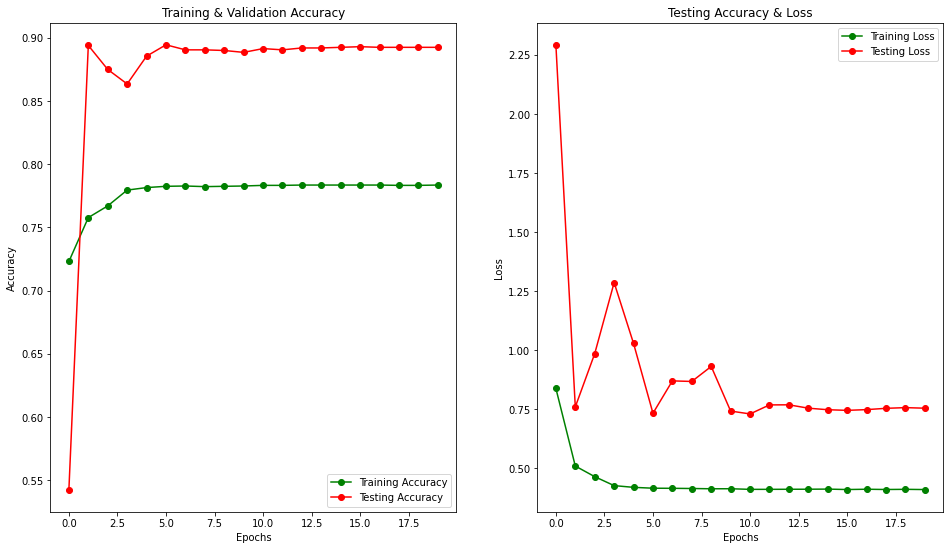

In [32]:
import matplotlib.pyplot as plt 

epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()